# Iterative Policy Evaluation in a grid world

### First we will derive it manually

Recall from Figure 4.5 that the algorithm we're trying to apply is:
    
$$V(s) \leftarrow \sum_a \pi (s,a) \sum_{s'} P^a_{ss'} [ R^a_{ss'}+ \gamma V(s)]$$
    

We start with the state value function, in matrix form, as all zeros:
```
[0,   0,   0,   0,   0]
[0,   0,   0,   0,   0]
[0,   0,   0,   0,   0]
[0,   0,   0,   0,   0]
[0,   0,   0,   0,   0]
```
The first step of the update process is to iterate over states, starting with (0, 0). The possible actions of North, South, East, West. Since actions are deterministic, there is only one $s'$ with a non-zero probability, so the summation over states simplifies to the one statement. For instance, if our environment was stochastic, we could go imagine our action being North from (0, 0), and ending up in (0,0), (0,1), or (1,0). We can express this as:

$$\sum_{s'} P^a_{ss'} * X(s')\ , where\ s = (0, 0), a = North $$
$$P^{North}_{(0,0), (0,0)} * X(0,0) + P^{North}_{(0,0), (1,0)} * X(1,0) + P^{North}_{(0,0), (1,0)} * X(0,1) $$
$$P^{North}_{(0,0), (0,0)} * X(0,0) + P^{North}_{(0,0), (1,0)} * X(1,0) + P^{North}_{(0,0), (1,0)} * X((0,1) $$
$$1.0 * X(0.0) + 0.0 * X(1,0) + 0.0 * X(0,1) $$
$$X(0.0)$$

So intuitively, at (0, 0), we update V(0,0) to be the one-step rewards of taking each step, weight by 0.25 because our policy is random. Formally:

$$V(0,0) \leftarrow 0.25*-1+0.25*0+0.25*0+0.25*-1$$
$$V(0,0) \leftarrow -0.5$$

We continue this process for all units. The value will be -0.5 for all corner states, and -0.25 for edge states, other than A and B, which are the only states with rewards greater than zero. The value will be 0 for all non-edge, non-corner states. For A, the rewards for each action are 10. For the action North, the new V would be equal to 10.  I'm going to abuse Q(s,a) notation here to be clear that this isn't the whole summation over actions, but just one action.

$$Q((1,0), N) = P^{north}_{(1,0)(1,4)} * [R^{north}_{(1,0)(1,4)} + \gamma V(0,0)]$$
$$Q((1,0), N) = 1 * [10 + 0.9 * 0.0]$$
$$Q((1,0), N) = 10$$

The Q values for each other action are equal, since going any direction out of A gives reward 10. Therefore, the sum of state-action values, weighted by the policy (0.25), ends up being 10 total.
By the same math, B is equal to 5. Now our state value looks like this:
```
[-.50,   10, -.25,   10, -.50]
[-.25,    0,    0,    0, -.25]
[-.25,    0,    0,    0, -.25]
[-.25,    0,    0,    0, -.25]
[-.50, -.25, -.25, -.25, -.50]
```

If we return for our next sweep over the states, we will see that things change for (0,0). The values of future states now have non-zero state value estimates.

$$Q((0,0), North) = R^{North}_{(0,0)(0,0)} + \gamma V(0,0)$$
$$Q((0,0), North) = -1 + 0.9 * -0.5$$
$$Q((0,0), North) = -1.45$$

$$Q((0,0), South) = R^{South}_{(0,0)(0,1)} + \gamma V(0,1)$$
$$Q((0,0), South) = 0 + 0.9 * -.25$$
$$Q((0,0), South) = -.225$$

$$Q((0,0), East) = R^{East}_{(0,0)(1,0)} + \gamma V(1,0)$$
$$Q((0,0), East) = 0 + 0.9 * 10$$
$$Q((0,0), East) = 9$$

$$Q((0,0), West) = R^{West}_{(0,0)(0,10} + \gamma V(0,0)$$
$$Q((0,0), West) = -1 + 0.9 * -.5$$
$$Q((0,0), West) = -1.45$$

Weighting the values of each action by their probability under policy $\pi$, we get:

$$V(0,0) \leftarrow 0.25*Q((0,0), North)+0.25*Q((0,0), South)+0.25*Q((0,0), East)+0.25*Q((0,0), West)$$
$$V(0,0) \leftarrow 0.25 * -1.45 + 0.25 * -0.225 + 0.25 * 9 + 0.25 * -1.45$$
$$V(0,0) \leftarrow 1.46875$$

Haha! We're finally getting some interesting numbers. The value of A also changes too, because we now have a non-zero V(1,4).

$$Q((1,0), East) = R^{East}_{(1,0)(1,4)} + \gamma V(1,4)$$
$$Q((1,0), East) = 10 + 0.9 * -0.25$$
$$Q((1,0), East) = 9.775$$

Now that we see how the manual process works, let's let the code finish it off for us.

### Code

In [ ]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=1)

In [1]:
def R(state, action, next_state):
    r = state[0]
    c = state[1]
    if c == 1 and r == 0:
        return 10
    elif c == 3 and r == 0:
        return 5
    elif (action == 'N' and r == 0) or \
            (action == 'S' and r == 4) or \
            (action == 'E' and c == 4) or \
            (action == 'W' and c == 0):
        return -1
    else:
        return 0


def Env(state, action):
    r = state[0]
    c = state[1]
    if c == 1 and r == 0:
        s = (4, 1)
    elif c == 3 and r == 0:
        s = (2, 3)
    elif (action == 'N' and r == 0) or \
            (action == 'S' and r == 4) or \
            (action == 'E' and c == 4) or \
            (action == 'W' and c == 0):
        s = (r, c)
    elif action == 'N':
        s = (r - 1, c)
    elif action == 'S':
        s = (r + 1, c)
    elif action == 'E':
        s = (r, c + 1)
    elif action == 'W':
        s = (r, c - 1)
        
    return s

def P(state, action, next_state):
    s = Env(state, action)
    if next_state[0] == s[0] and next_state[1] == s[1]:
        return 1
    else:
        return 0


def A(state):
    return ['N', 'S', 'E', 'W']


def next_states(state):
    r = state[0]
    c = state[1]
    if c == 1 and r == 0:
        return [(4, 1)]
    elif c == 3 and r == 0:
        return [(2, 3)]
    return {(r - 1 if r > 0 else r, c),
            (r + 1 if r < 4 else r, c),
            (r, c - 1 if c > 0 else c),
            (r, c + 1 if c < 4 else c)}


def S():
    states = []
    for i in range(5):
        for j in range(5):
            states.append((i, j))
    return states


def Pi(state, action):
    return 0.25

### Code

Now that we have our P, R, and Pi, lets iteratively solve the system of linear equations that is the Value of policy $\pi$

In [4]:
def evaluate_policy(gamma=0.9, debug=True, R_=R):
    V = np.zeros((5, 5))
    iters = 0
    converged = False
    while not converged: 
        delta = 0
        newV = np.zeros((5,5))
        for s in S():
            v = V[s]
            sum_over_actions = 0
            for a in A(s): # this corresponds to the summation over actions
                sum_over_next_states = 0
                for next_state in next_states(s): # this corresponds to the summation over next states
                    p = P(s, a, next_state)
                    r = R_(s, a, next_state)
                    x = gamma * V[next_state]
                    sum_over_next_states += p * (r + x)
                sum_over_actions += Pi(s, a) * sum_over_next_states
            newV[s] = sum_over_actions
            delta = np.fmax(delta, abs(newV[s] - v))

        if delta == 0.0:
            if debug:
                print("Converged with delta {:.2f} at iter {}".format(delta, iters))
                print(np.round(V, 1))
            converged = True

        iters += 1    
    #     print(newV)
        V = newV
    
    return iters, V
        
_, _ = evaluate_policy()

Converged with delta 0.00 at iter 323
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


### Well, there you have it. It matches the results of Sutto & Barto exactly (as it should!)

Now, there's another version of this algorithm that doesn't store updates to V(s) in a seperate array, but rather replaces them as we sweep over the states. We can see that this version actually converges faster than the previous version.

In [5]:
def evaluate_policy_inplace(gamma=0.9, debug=True, R_=R):
    V = np.zeros((5, 5))
    iters = 0
    converged = False
    while not converged: 
        delta = 0
        for s in S():
            v = V[s]
            sum_over_actions = 0
            for a in A(s): # this corresponds to the summation over actions
                sum_over_next_states = 0
                for next_state in next_states(s): # this corresponds to the summation over next states
                    p = P(s, a, next_state)
                    r = R_(s, a, next_state)
                    x = gamma * V[next_state]
                    sum_over_next_states += p * (r + x)
                sum_over_actions += Pi(s, a) * sum_over_next_states
            V[s] = sum_over_actions
            delta = np.fmax(delta, abs(V[s] - v))

        if delta == 0.0 and iters > 1:
            if debug:
                print("Converged at iter {} w/ gamma {}".format(iters, gamma))
                print(np.round(V, 1))
            converged = True

        iters += 1    
    #     print(V)
    
    return iters, V
    
_, _ = evaluate_policy_inplace()

Converged at iter 200 w/ gamma 0.9
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


Let's see how the gamma effects the convergence.

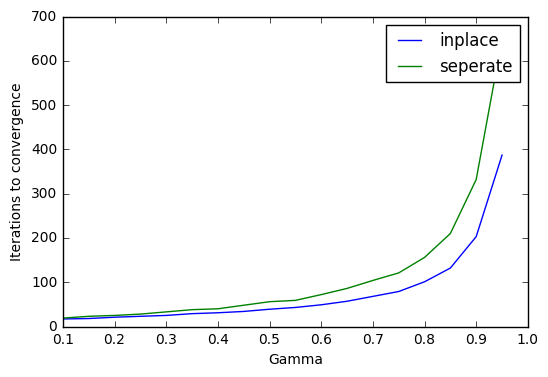

In [7]:
x = np.arange(0.1, 1, 0.05)
y_inplace = [evaluate_policy_inplace(gamma, False)[0] for gamma in x]
y_seperate = [evaluate_policy(gamma, False)[0] for gamma in x]
plt.plot(x, y_inplace, label="inplace")
plt.plot(x, y_seperate, label="seperate")
plt.xlabel("Gamma")
plt.ylabel("Iterations to convergence")
plt.legend()
plt.show()

This result surprised me, although I'm realizing it shouldn't. The more you take the future into account, with a higher gamma, the more iterations it takes to converge. This makes sense, since each iteration is a one-step backup/lookahead.

### Exercise 3.10

Prove that if we add a constant $C$ to all rewards, that $V(s)$ changes by a constant $K$. First, let's do the math. Then we'll let the code provide support for that answer. For brevity, I'll write $P^a_{ss'}$ as $P$, and the same for $R$.

$$V'(s) \leftarrow \sum_a \pi(s,a) \sum_{s'} P [ (R + C) + \gamma * V(s)]$$
$$V'(s) \leftarrow \sum_a \pi(s,a) \sum_{s'} P [ R + \gamma * V(s)] + P [ C ]$$
$$V'(s) \leftarrow \sum_a \pi(s,a) \sum_{s'} P [ (R + \gamma * V(s)) ] + \sum_a \pi(s,a) \sum_{s'} P [C]$$
$$V'(s) \leftarrow \sum_a \pi(s,a) \sum_{s'} P [ (R + \gamma * V(s)) ] + K$$

For one update, we can then see the relation between $C$ and $K$ as such:

$$K = \sum_a \pi(s,a) \sum_{s'} P [C]$$

This can be simplified, amazingly, to $K = C$. This is because the two summations are actually weighted sums, where the weights add up to 1.

Reducing the above equation, $V'_t(s) = V_t(s) + C$. Extending this to the next iteration:

$$V'_{t+1}(s) = \gamma V'_t(s) + C$$
$$V'_{t+1}(s) = \gamma (V_t(s) + C) + C$$
$$V'_{t+1}(s) = \gamma V_t(s) + \gamma C + C$$

The natual generalize form is therefore $V'(s) = V(s) + \sum_{t=0}^{\infty} \gamma^t C$

### Code

In [8]:
def R_plus_c(C=2):
    def R_plus_(state, action, next_state):
        return R(state, action, next_state) + C
    
    return R_plus_

print("C = 0")
_, V_c0 = evaluate_policy_inplace(R_=R_plus_c(0))
print("C = 2")
_, V_c2 = evaluate_policy_inplace(R_=R_plus_c(2))
print("C = 4")
_, _ = evaluate_policy_inplace(R_=R_plus_c(4))
print("C = -3")
_, _ = evaluate_policy_inplace(R_=R_plus_c(-3))

C = 0
Converged at iter 200 w/ gamma 0.9
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]
C = 2
Converged at iter 203 w/ gamma 0.9
[[ 23.3  28.8  24.4  25.3  21.5]
 [ 21.5  23.   22.3  21.9  20.5]
 [ 20.1  20.7  20.7  20.4  19.6]
 [ 19.   19.6  19.6  19.4  18.8]
 [ 18.1  18.7  18.8  18.6  18. ]]
C = 4
Converged at iter 200 w/ gamma 0.9
[[ 43.3  48.8  44.4  45.3  41.5]
 [ 41.5  43.   42.3  41.9  40.5]
 [ 40.1  40.7  40.7  40.4  39.6]
 [ 39.   39.6  39.6  39.4  38.8]
 [ 38.1  38.7  38.8  38.6  38. ]]
C = -3
Converged at iter 198 w/ gamma 0.9
[[-26.7 -21.2 -25.6 -24.7 -28.5]
 [-28.5 -27.  -27.7 -28.1 -29.5]
 [-29.9 -29.3 -29.3 -29.6 -30.4]
 [-31.  -30.4 -30.4 -30.6 -31.2]
 [-31.9 -31.3 -31.2 -31.4 -32. ]]


We can compare for $s=(0,0)$ and $C=2$ if our math above is correct.

$V(0,0)$ was $3.3$ and is now $23.3$

$K = \sum_{i=0}^{\infty} \gamma^i C$

In [9]:
import math
C = 2
gamma = 0.9
k = 0
for i in range(200):
    k += math.pow(gamma, i) * C

print(V_c0 + k)

print("Equal:", np.all(abs(V_c0 + k - V_c2) < 1e-5))

[[ 23.3  28.8  24.4  25.3  21.5]
 [ 21.5  23.   22.3  21.9  20.5]
 [ 20.1  20.7  20.7  20.4  19.6]
 [ 19.   19.6  19.6  19.4  18.8]
 [ 18.1  18.7  18.8  18.6  18. ]]
Equal: True


It matches! This output is equal to the C=2 output above. This means that the relationship between C and K is in fact:
$$K = \sum_{i=0}^{\infty} \gamma^i C$$